#Apartments in Poland - Exploratory Data Analyst

##Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


##Getting data from GitHub

In [2]:
url = 'https://raw.githubusercontent.com/sztyberj/ApartmentsPricesInPoland/main/Data%20Pre-Processing/apartments_prices_in_poland_050622.csv'
data = pd.read_csv(url, sep=';')
data

,Unnamed: 0,City,Price [PLN],Price/sqr_meter [PLN],Area [m^2],Rooms,Level
0,6746,Cracow,645000.00,9969.00,64.70,3.0,0.0
1,6775,Cracow,481948.32,10416.00,46.27,3.0,5.0
2,6774,Cracow,400599.00,11100.00,36.09,2.0,1.0
3,6773,Cracow,980000.00,12500.00,78.40,3.0,5.0
4,6772,Cracow,694000.00,13950.00,49.75,3.0,3.0
...,...,...,...,...,...,...,...
7041,3179,Zielona Gora,549000.00,8218.56,66.80,3.0,1.0
7042,3180,Zielona Gora,489000.00,7606.16,64.29,3.0,1.0
7043,3181,Zielona Gora,355000.00,9220.78,38.50,2.0,2.0
7044,3173,Zielona Gora,379000.00,8813.95,43.00,2.0,1.0


##Clearing data

In [3]:
#Delete Unnamed column
del data['Unnamed: 0']

data.head(5)

,City,Price [PLN],Price/sqr_meter [PLN],Area [m^2],Rooms,Level
0,Cracow,645000.00,9969.0,64.70,3.0,0.0
1,Cracow,481948.32,10416.0,46.27,3.0,5.0
2,Cracow,400599.00,11100.0,36.09,2.0,1.0
3,Cracow,980000.00,12500.0,78.40,3.0,5.0
4,Cracow,694000.00,13950.0,49.75,3.0,3.0


In [4]:
#Check nulls
data.isna().sum()

City                     0
Price [PLN]              0
Price/sqr_meter [PLN]    0
Area [m^2]               0
Rooms                    0
Level                    0
dtype: int64

##Describing data

In [5]:
data.dtypes

City                      object
Price [PLN]              float64
Price/sqr_meter [PLN]    float64
Area [m^2]               float64
Rooms                    float64
Level                    float64
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7046 entries, 0 to 7045
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   City                   7046 non-null   object 
 1   Price [PLN]            7046 non-null   float64
 2   Price/sqr_meter [PLN]  7046 non-null   float64
 3   Area [m^2]             7046 non-null   float64
 4   Rooms                  7046 non-null   float64
 5   Level                  7046 non-null   float64
dtypes: float64(5), object(1)
memory usage: 330.4+ KB


In [7]:
data.describe()

,Price [PLN],Price/sqr_meter [PLN],Area [m^2],Rooms,Level
count,7.046000e+03,7046.000000,7046.000000,7046.000000,7046.000000
mean,6.291798e+05,11036.755335,57.178071,2.591967,2.575504
std,9.005424e+05,3825.994411,24.737771,0.934620,2.376722
min,7.600000e+03,33.130000,12.700000,1.000000,-0.500000
25%,4.299250e+05,8666.752500,42.252500,2.000000,1.000000
50%,5.487145e+05,10450.000000,53.000000,3.000000,2.000000
75%,6.990000e+05,12640.000000,66.000000,3.000000,4.000000
max,6.908571e+07,42692.000000,578.000000,10.000000,11.000000


**Disable scientific notation**

In [8]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [9]:
data.describe()

,Price [PLN],Price/sqr_meter [PLN],Area [m^2],Rooms,Level
count,7046.000,7046.000,7046.000,7046.000,7046.000
mean,629179.784,11036.755,57.178,2.592,2.576
std,900542.434,3825.994,24.738,0.935,2.377
min,7600.000,33.130,12.700,1.000,-0.500
25%,429925.000,8666.753,42.252,2.000,1.000
50%,548714.500,10450.000,53.000,3.000,2.000
75%,699000.000,12640.000,66.000,3.000,4.000
max,69085710.000,42692.000,578.000,10.000,11.000


Too high difference between max and 75% values in: Price, Price/sqr_meter and Area features.

**Decribe each city**

In [10]:
for i in data.City.unique():
  print('\n' + i + '\n')
  print(data[data.City == i].describe())


Cracow

       Price [PLN]  Price/sqr_meter [PLN]  Area [m^2]   Rooms   Level
count      961.000                961.000     961.000 961.000 961.000
mean    732555.874              12021.494      55.051   2.530   2.433
std    2248996.607               2907.572      24.666   0.965   2.266
min      44900.000               1103.190      12.700   1.000  -0.500
25%     470000.000              10164.000      40.000   2.000   1.000
50%     590000.000              11646.000      51.300   3.000   2.000
75%     739700.000              13250.000      64.000   3.000   4.000
max   69085710.000              38536.590     280.000   7.000  11.000

Gdansk

       Price [PLN]  Price/sqr_meter [PLN]  Area [m^2]    Rooms    Level
count     1002.000               1002.000    1002.000 1002.000 1002.000
mean    658841.254              12066.587      55.726    2.568    2.396
std     376078.678               4698.435      24.535    0.869    2.331
min      67000.000               1109.270      17.000    1.000  

##Scatter plot grid

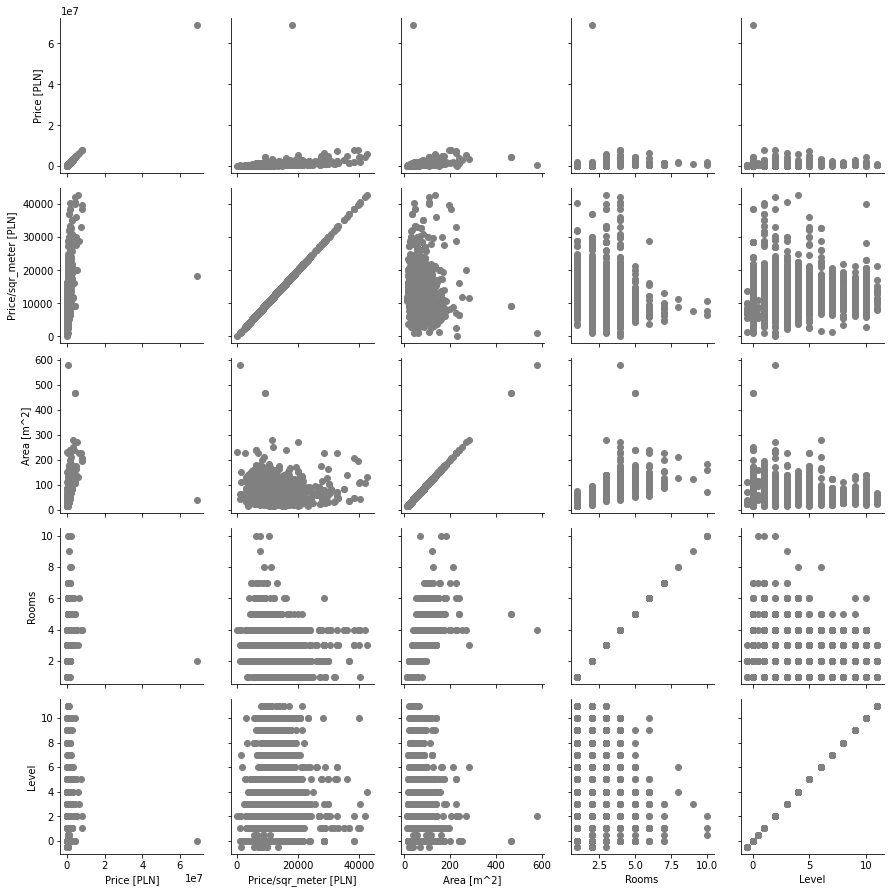

In [11]:
p = sns.PairGrid(data)
p.map(plt.scatter, color='grey')

##Boxplots for Outliers

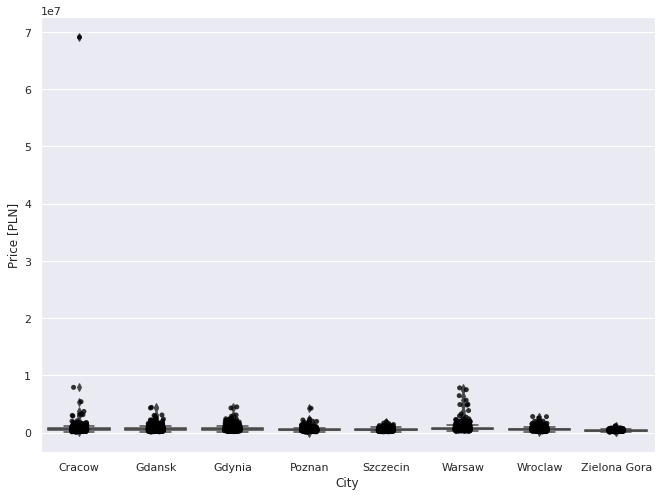

In [12]:
sns.set(rc={'figure.figsize':(11,8)})

sns.boxplot(x = 'City', y = 'Price [PLN]', data = data)
sns.stripplot(x = 'City', y = 'Price [PLN]', data = data,
             jitter=True,
             marker='o',
             alpha=0.8,
             color='black')

Only Cracow have strong Outliers in Price feature.

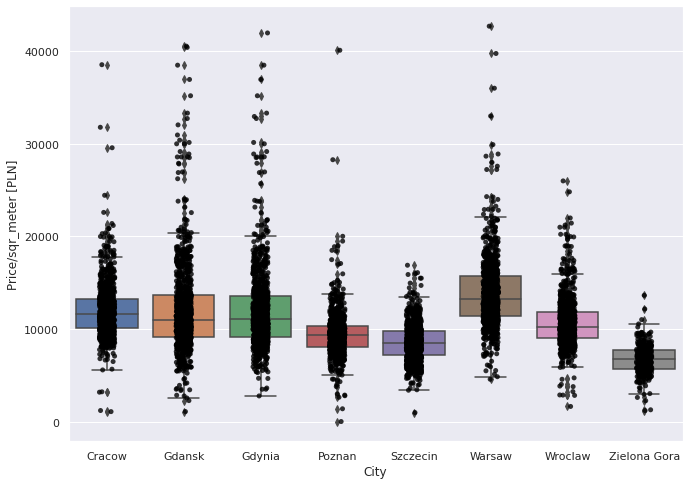

In [13]:
sns.set(rc={'figure.figsize':(11,8)})

sns.boxplot(x = 'City', y = 'Price/sqr_meter [PLN]', data = data)
sns.stripplot(x = 'City', y = 'Price/sqr_meter [PLN]', data = data,
             jitter=True,
             marker='o',
             alpha=0.8,
             color='black')

Except Szczecin and Zielona Gora, all others City have strong Outliers in Price/sqr_meter feature.

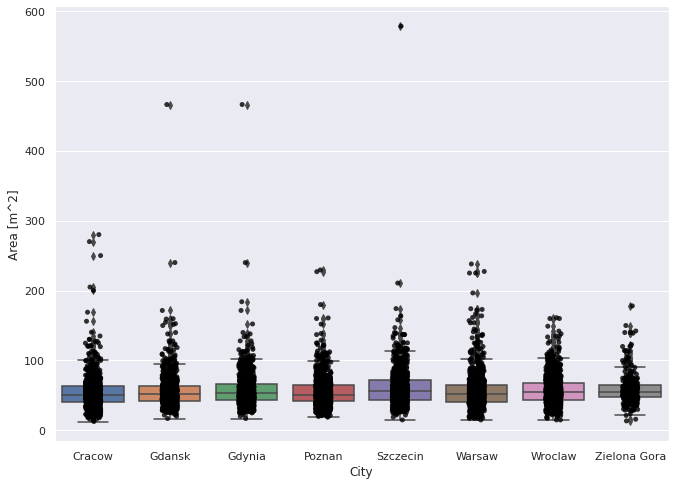

In [14]:
sns.set(rc={'figure.figsize':(11,8)})

sns.boxplot(x = 'City', y = 'Area [m^2]', data = data)
sns.stripplot(x = 'City', y = 'Area [m^2]', data = data,
             jitter=True,
             marker='o',
             alpha=0.8,
             color='black')

Gdansk, Gdynia and Szczecin have strong Outliers in Area feature.

##Clearing Outliers (IQR Method)

In [15]:
#Creating new data frame
data_o = data

*The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured.*

In [16]:
z = np.abs(stats.zscore(data_o.loc[:, data_o.columns != 'City']))
print(z)

[[0.01756868 0.27909897 0.30408813 0.43660743 1.0837141 ]
 [0.16350358 0.16225831 0.44097931 0.43660743 1.02017347]
 [0.25384368 0.01653143 0.85252497 0.63342247 0.66293659]
 ...
 [0.30448231 0.47467508 0.75509618 0.63342247 0.24215907]
 [0.27782982 0.58101577 0.57317521 0.63342247 0.66293659]
 [0.08904131 0.97151713 0.72048501 0.43660743 1.0837141 ]]


**Set threshold**

In [17]:
threshold = 3
print(np.where(z > 3))

(array([  47,   96,  108,  127,  129,  194,  214,  217,  329,  330,  370,
        413,  413,  413,  423,  423,  428,  455,  460,  469,  469,  507,
        531,  557,  589,  657,  679,  679,  698,  754,  756,  789,  797,
        804,  948,  954,  966, 1036, 1042, 1042, 1061, 1069, 1069, 1081,
       1082, 1090, 1105, 1124, 1131, 1135, 1182, 1183, 1185, 1188, 1189,
       1194, 1210, 1210, 1222, 1228, 1241, 1242, 1248, 1251, 1265, 1275,
       1276, 1277, 1282, 1284, 1289, 1296, 1299, 1300, 1330, 1341, 1350,
       1359, 1360, 1365, 1366, 1376, 1377, 1382, 1411, 1414, 1414, 1421,
       1477, 1526, 1554, 1557, 1560, 1568, 1589, 1590, 1592, 1606, 1631,
       1655, 1657, 1723, 1739, 1742, 1759, 1767, 1807, 1821, 1838, 1849,
       1850, 1855, 1872, 1881, 1893, 1910, 1914, 1995, 1995, 2003, 2013,
       2018, 2031, 2092, 2108, 2108, 2117, 2117, 2118, 2119, 2135, 2145,
       2151, 2165, 2165, 2166, 2167, 2176, 2228, 2229, 2241, 2275, 2303,
       2312, 2352, 2352, 2359, 2370, 2371, 2384, 2

*IQR is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles.*

In [18]:
#IQR for each column
Q1 = data_o.quantile(0.25)
Q3 = data_o.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Price [PLN]             269075.000
Price/sqr_meter [PLN]     3973.247
Area [m^2]                  23.748
Rooms                        1.000
Level                        3.000
dtype: float64


**Deleting outliers**

In [19]:
data_o = data_o[(z < 3).all(axis=1)]

**Data frame size comparsion**

In [20]:
data_o.shape

(6642, 6)

In [21]:
data.shape

(7046, 6)

##Correlation between features

###Correlation for data with Outliers

In [22]:
correlation = data.corr()
correlation

,Price [PLN],Price/sqr_meter [PLN],Area [m^2],Rooms,Level
Price [PLN],1.000,0.266,0.258,0.176,0.009
Price/sqr_meter [PLN],0.266,1.000,-0.122,-0.172,0.130
Area [m^2],0.258,-0.122,1.000,0.733,-0.051
Rooms,0.176,-0.172,0.733,1.000,-0.039
Level,0.009,0.130,-0.051,-0.039,1.000


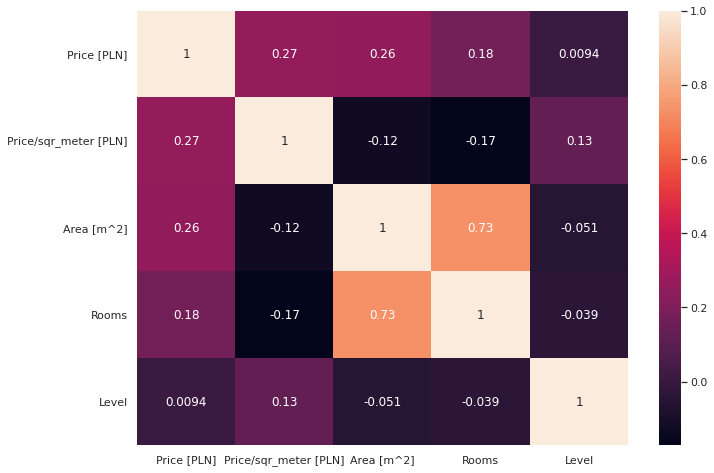

In [23]:
sns.heatmap(correlation, annot=True)

**The highest positive correlation is between:**

 Rooms and Area: 0.73
 

</br>

 **The highest negative correlation is between:**

 Rooms and Price/sqr_meter: -0.17

###Correlation for data without Outliers

In [24]:
correlation_o = data_o.corr()
correlation_o

,Price [PLN],Price/sqr_meter [PLN],Area [m^2],Rooms,Level
Price [PLN],1.000,0.539,0.666,0.513,0.028
Price/sqr_meter [PLN],0.539,1.000,-0.210,-0.215,0.101
Area [m^2],0.666,-0.210,1.000,0.801,-0.049
Rooms,0.513,-0.215,0.801,1.000,-0.030
Level,0.028,0.101,-0.049,-0.030,1.000


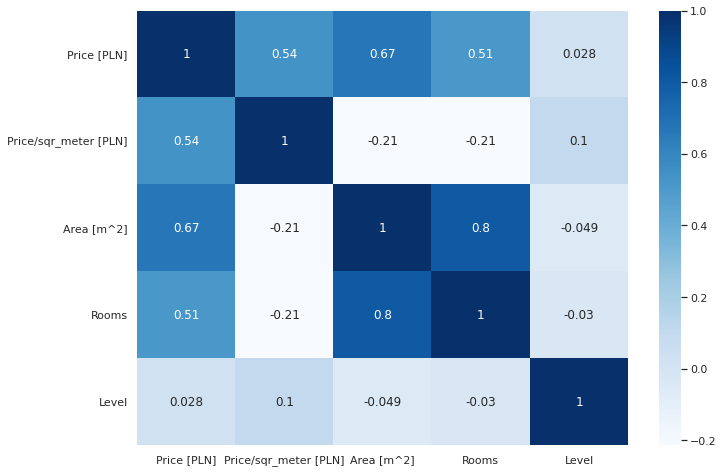

In [25]:
sns.heatmap(correlation_o, annot=True, cmap='Blues')

**The highest positive correlation is between:**

 Rooms and Area: 0.8
 
 Area and Price [PLN]: 0.67

</br>

 **The highest negative correlation is between:**

 Area and Price/sqr_meter: -0.21

 Rooms and Price/sqr_meter: -0.21

###Conclusions

Data without Outliers strengthened both correlations.

##Justification

For further analysis, I used data without outliers because the data comes from a platform where anyone can add a listing. This may therefore distort the overall picture of apartment values in Poland. 

##Skewness

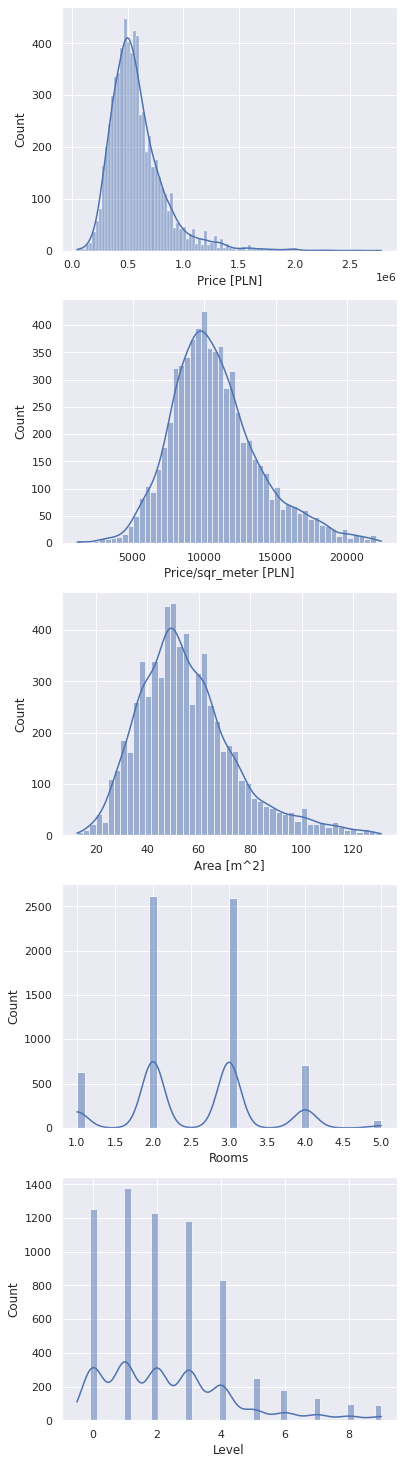

In [26]:
sns.set(rc={'figure.figsize':(6,26)})
count = 1
for i in data_o.columns[data_o.columns != 'City']:
  plt.subplot(5,1,count)
  sns.histplot(data_o[i], kde=True)
  count += 1

plt.show()

"Price/sqr_meter" column appears to be normally distributed

##Questions

**Which apartment is the most expensive?**

In [27]:
data_o[data_o['Price [PLN]'] == data_o['Price [PLN]'].max()]

,City,Price [PLN],Price/sqr_meter [PLN],Area [m^2],Rooms,Level
6004,Wroclaw,2780800.000,21227.000,131.000,4.000,5.000


**Which apartment is the cheapest?**



In [28]:
data_o[data_o['Price [PLN]'] == data_o['Price [PLN]'].min()]

,City,Price [PLN],Price/sqr_meter [PLN],Area [m^2],Rooms,Level
393,Cracow,44900.000,1103.190,40.700,2.000,0.000


**Which apartments cost more than one million PLN?**

In [29]:
data_o[data_o['Price [PLN]'] > 1000000]

,City,Price [PLN],Price/sqr_meter [PLN],Area [m^2],Rooms,Level
15,Cracow,2073042.000,15900.000,130.380,4.000,1.000
16,Cracow,1358280.000,14003.000,97.000,4.000,4.000
20,Cracow,1050500.000,12500.000,84.040,4.000,1.000
23,Cracow,1168860.000,16500.000,70.840,3.000,0.000
31,Cracow,1530000.000,16558.000,92.400,5.000,3.000
...,...,...,...,...,...,...
6634,Wroclaw,1350000.000,12162.000,111.000,4.000,3.000
6636,Wroclaw,1335000.000,16481.000,81.000,4.000,8.000
6644,Wroclaw,1150000.000,18400.000,62.500,2.000,2.000
6690,Wroclaw,1026000.000,15155.000,67.700,3.000,1.000


**What is the average apartment price for each city?**

In [30]:
avg = pd.DataFrame(columns=['City', 'Avg'])
for i in data_o.City.unique():
  tmp = pd.DataFrame({'City': [i],'Avg' : [data_o['Price [PLN]'][data_o.City == i].mean()]})
  avg = pd.concat([avg, tmp], ignore_index = True)

avg

,City,Avg
0,Cracow,625354.462
1,Gdansk,603785.490
2,Gdynia,627658.684
3,Poznan,502006.806
4,Szczecin,496886.763
5,Warsaw,723986.523
6,Wroclaw,594226.605
7,Zielona Gora,383309.532


**How many apartments cost more than average price in each city?**

In [31]:
list = []
percent = []
for i in range(len(avg)):
  q = len(data_o[(data_o.City == avg.City[i]) & (data_o['Price [PLN]'] > avg.Avg[i])])
  list.append(q)

  p = (q/len(data_o[(data_o.City == avg.City[i])])*100)
  percent.append(p)

#Value in numbers
avg['Count_apart_cost_more_than_Avg'] = list

#Value in percents
avg['Percentage_of_calculated_val'] = percent
avg

,City,Avg,Count_apart_cost_more_than_Avg,Percentage_of_calculated_val
0,Cracow,625354.462,397,42.688
1,Gdansk,603785.490,356,38.486
2,Gdynia,627658.684,347,37.312
3,Poznan,502006.806,344,38.095
4,Szczecin,496886.763,377,44.615
5,Warsaw,723986.523,313,36.353
6,Wroclaw,594226.605,365,39.804
7,Zielona Gora,383309.532,137,41.390


**Which apartments cost more than 3rd quantile of Price?**

In [32]:
data_o[data_o['Price [PLN]'] > np.percentile(data_o['Price [PLN]'], 75)]

,City,Price [PLN],Price/sqr_meter [PLN],Area [m^2],Rooms,Level
3,Cracow,980000.000,12500.000,78.400,3.000,5.000
4,Cracow,694000.000,13950.000,49.750,3.000,3.000
7,Cracow,789300.000,11749.000,67.180,4.000,6.000
8,Cracow,977670.000,9000.000,108.630,3.000,4.000
12,Cracow,799000.000,12484.000,64.000,3.000,6.000
...,...,...,...,...,...,...
6960,Zielona Gora,700000.000,9479.960,73.840,4.000,1.000
6975,Zielona Gora,699000.000,6721.000,104.000,4.000,1.000
6978,Zielona Gora,710000.000,7634.000,93.000,3.000,4.000
6995,Zielona Gora,699000.000,9470.000,73.810,3.000,0.000


**Which apartments are at the hightest level?**

In [33]:
data_o[data_o.Level == data_o.Level.max()]

,City,Price [PLN],Price/sqr_meter [PLN],Area [m^2],Rooms,Level
164,Cracow,470000.000,10428.000,45.070,2.000,9.000
225,Cracow,550000.000,13095.240,42.000,2.000,9.000
308,Cracow,395000.000,10972.220,36.000,1.000,9.000
387,Cracow,640000.000,11351.540,56.380,3.000,9.000
538,Cracow,555000.000,12614.000,44.000,3.000,9.000
...,...,...,...,...,...,...
6187,Wroclaw,429000.000,10463.000,41.000,2.000,9.000
6279,Wroclaw,565000.000,9401.000,60.100,3.000,9.000
6880,Zielona Gora,350000.000,6140.350,57.000,3.000,9.000
6903,Zielona Gora,280000.000,7368.420,38.000,2.000,9.000


##Save files

In [34]:
data_o.reset_index(drop=True, inplace=True)

In [35]:
csv = data.to_csv(f'/content/gdrive/My Drive/data_with_outliers.csv', sep=';')
csv = data_o.to_csv(f'/content/gdrive/My Drive/data.csv', sep=';')